In [91]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

 開啟總搜尋資料表

In [92]:
# df_search_overview = pd.read_csv('C:/Users/User/Desktop/googleapi/googlemaps爬蟲_ver10/search_overview.csv')
df_search_overview = pd.read_csv('C:/Users/User/Desktop/googleapi/googlemaps_爬蟲/googlemaps爬蟲與清整/result/search_overview.csv')
df_search_overview = df_search_overview.drop(['Unnamed: 0'],axis = 1)

In [93]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df_search_overview.head(2)

,keyword,name,current_time,rating,rating_count,category,address,introduce,Website,img,latitude,longitude,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_introduction,rw_phone,rw_address,rw_city,rw_town,stay_time
0,南投縣中寮鄉 景點推薦,中寮劉家梅園休園（一期一會明年再見）,2023-08-02 18:35:21,4.3,125.0,旅遊景點,頂坑巷12號,NaN,https://www.google.com/maps/place/%E4%B8%AD%E5%AF%AE%E5%8A%89%E5%AE%B6%E6%A2%85%E5%9C%92+%E4%BC%91%E5%9C%92+%EF%BC%88%E4%B8%80%E6%9C%9F%E4%B8%80%E6%9C%83%E6%98%8E%E5%B9%B4%E5%86%8D%E8%A6%8B%EF%BC%89/data=!4m7!3m6!1s0x346928a161e870a5:0xf5b64d71087260e8!8m2!3d23.9553273!4d120.8237057!16s%2Fg%2F11c6cfq6j2!19sChIJpXDoYaEoaTQR6GByCHFNtvU?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipPowNN_-sHOTh7S1CrIeWfaL5bUqc9sLM2FbCA-=w162-h92-k-no,23.955327,120.823706,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0983 756 921,541南投縣中寮鄉頂坑巷12號,南投縣,中寮鄉,NaN
1,南投縣中寮鄉 景點推薦,剝皮寮歷史街區,2023-08-02 18:35:21,4.2,12238.0,歷史建築,康定路173巷,18 世紀房屋林立的城市街區,https://www.google.com/maps/place/%E5%89%9D%E7%9A%AE%E5%AF%AE%E6%AD%B7%E5%8F%B2%E8%A1%97%E5%8D%80/data=!4m7!3m6!1s0x3442a9a8d017b6dd:0xff3361bbadd40fe9!8m2!3d25.036838!4d121.5021648!16s%2Fg%2F155r2_r7!19sChIJ3bYX0KipQjQR6Q_UrbthM_8?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipP-Th0_kVH7FwpP1nvvsa7-FUeay2h85eQhG4eV=w122-h92-k-no,25.036838,121.502165,旅遊景點,無障礙入口 無障礙洗手間 性別友善洗手間 適合兒童,NaN,星期二09:00–18:00 星期三09:00–18:00 星期四09:00–18:00 星期五09:00–18:00 星期六09:00–18:00 星期日09:00–18:00 星期一休息,NaN,NaN,900.0,1800.0,900.0,1800.0,900.0,1800.0,900.0,1800.0,900.0,1800.0,900.0,1800.0,具歷史意義的城市街區，坐擁 18 世紀傳統建築群，另有教育中心。,02 2302 3199,108台北市萬華區康定路173巷,台北市,萬華區,NaN


In [94]:
print('total search count: ',len(df_search_overview))
df_search_overview.isnull().sum().drop(['keyword','rw_Monday_open','rw_Monday_close','rw_Tuesday_open','rw_Tuesday_close','rw_Wednesday_open','rw_Wednesday_close','rw_Thursday_open','rw_Thursday_close','rw_Friday_open','rw_Friday_close','rw_Saturday_open','rw_Saturday_close','rw_Sunday_open','rw_Sunday_close'])



total search count:  6075


name                  0
current_time          0
rating                0
rating_count          0
category             12
address            1483
introduce           656
Website               0
img                   0
latitude             32
longitude            32
rw_category          12
rw_tag               85
rw_tickets_sale    5823
rw_open_time        801
rw_introduction    4823
rw_phone           2618
rw_address            0
rw_city               6
rw_town              20
stay_time          3541
dtype: int64

各縣市景點數量

In [95]:
country_counts = df_search_overview['rw_city'].value_counts()
total_sum = country_counts.sum()
print("total_sum",total_sum)
country_counts

total_sum 6069


新北市    848
台中市    551
高雄市    508
台南市    489
台北市    412
苗栗縣    340
屏東縣    332
桃園市    325
嘉義縣    312
彰化縣    267
南投縣    230
台東縣    227
花蓮縣    200
新竹縣    198
雲林縣    187
宜蘭縣    164
澎湖縣    128
基隆市    114
金門縣     75
新竹市     69
連江縣     64
嘉義市     28
桃園縣      1
Name: rw_city, dtype: int64

In [96]:
# canada_indices = df_search_overview.index[df_search_overview['rw_city'] == '文山區台北市']
# canada_indices

In [97]:
country_counts[country_counts < 10]

桃園縣    1
Name: rw_city, dtype: int64

In [98]:
tmpcitylist = country_counts[country_counts < 10].index
for i in tmpcitylist:
    print(df_search_overview[df_search_overview['rw_city'] == i]['name'])
# tmpcitylist/

3424    東勢
Name: name, dtype: object


In [99]:
# # 先整理數量少的 可能是沒分好
# country_counts[country_counts < 10]

# tmpcitylist = country_counts[country_counts < 10].index.tolist()
# for i in tmpcitylist:
#     match = re.search(r"[區鄉鎮市村](.+?[市縣])", i)
#     if match:
#         city = match.group(1)

#     df_search_overview['rw_city'] = df_search_overview['rw_city'].replace(i, city)

In [100]:
# 桃園縣 改 桃園市
df_search_overview['rw_city'] = df_search_overview['rw_city'].replace('桃園縣', '桃園市')

In [101]:
# 看整理完後狀況
country_counts = df_search_overview['rw_city'].value_counts()
total_sum = country_counts.sum()
print("total_sum",total_sum)
country_counts

total_sum 6069


新北市    848
台中市    551
高雄市    508
台南市    489
台北市    412
苗栗縣    340
屏東縣    332
桃園市    326
嘉義縣    312
彰化縣    267
南投縣    230
台東縣    227
花蓮縣    200
新竹縣    198
雲林縣    187
宜蘭縣    164
澎湖縣    128
基隆市    114
金門縣     75
新竹市     69
連江縣     64
嘉義市     28
Name: rw_city, dtype: int64

In [102]:
# 計算比例
total_sum = country_counts.sum()
count_by_category_percentage = country_counts / total_sum
print('總資料筆數: ','{:,}'.format(len(df_search_overview)))
print('以分類比數:',total_sum)
print(count_by_category_percentage.apply(lambda x: '{:.2%}'.format(x)))

總資料筆數:  6,075
以分類比數: 6069
新北市    13.97%
台中市     9.08%
高雄市     8.37%
台南市     8.06%
台北市     6.79%
苗栗縣     5.60%
屏東縣     5.47%
桃園市     5.37%
嘉義縣     5.14%
彰化縣     4.40%
南投縣     3.79%
台東縣     3.74%
花蓮縣     3.30%
新竹縣     3.26%
雲林縣     3.08%
宜蘭縣     2.70%
澎湖縣     2.11%
基隆市     1.88%
金門縣     1.24%
新竹市     1.14%
連江縣     1.05%
嘉義市     0.46%
Name: rw_city, dtype: object


檢查rw_city空值狀況

In [103]:
null_count = df_search_overview['rw_city'].isnull().sum()
print('city null count: ',null_count)
print('total count: ',len(df_search_overview['name']))
print('city null rate: ',round(null_count/len(df_search_overview['name'])*100,2),'%')
print('rw_city_null: ')
rw_city_null = df_search_overview['rw_city'].isnull()
df_search_overview[rw_city_null]

city null count:  6
total count:  6075
city null rate:  0.1 %
rw_city_null: 


,keyword,name,current_time,rating,rating_count,category,address,introduce,Website,img,latitude,longitude,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_introduction,rw_phone,rw_address,rw_city,rw_town,stay_time
3526,臺中市清水區 景點推薦,高美濕地木棧道,2023-08-02 13:36:35,4.8,31.0,旅遊景點,436,NaN,https://www.google.com/maps/place/%E9%AB%98%E7%BE%8E%E6%BF%95%E5%9C%B0%E6%9C%A8%E6%A3%A7%E9%81%93/data=!4m7!3m6!1s0x3469138c836181bd:0xdf6435442ccdebd9!8m2!3d24.3122662!4d120.548809!16s%2Fg%2F11st8wm59q!19sChIJvYFhg4wTaTQR2evNLEQ1ZN8?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipPOAEauetywngUoSMCbIDS4VupjQrntfiXq5i4q=w137-h92-k-no,24.312266,120.548809,旅遊景點,適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,清水區436,NaN,NaN,NaN
3626,臺北市 景點推薦,陽明山國家公園,2023-08-02 09:55:47,4.5,23880.0,旅遊景點,NaN,風景如畫的地區，有火山，適合健走,https://www.google.com/maps/place/%E9%99%BD%E6%98%8E%E5%B1%B1%E5%9C%8B%E5%AE%B6%E5%85%AC%E5%9C%92/data=!4m7!3m6!1s0x3442adf824cfc74b:0x5c0be3a34fc3b079!8m2!3d25.1942462!4d121.5609363!16zL20vMDJzZjZt!19sChIJS8fPJPitQjQRebDDT6PjC1w?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipNG_qzs-m4dG_NGfnYX2OMq9ntsATxj5F8J9MTN=w122-h92-k-no,25.194246,121.560936,旅遊景點,無障礙入口 無障礙停車場 健行 允許帶狗 公共廁所 野餐桌 適合兒童,免費,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,風景秀麗的景點，有溫泉和健走步道，該國最大的休眠火山也位於此。,NaN,ymsnp.gov.tw,NaN,NaN,NaN
4524,臺東縣東河鄉 景點推薦,石雨傘,2023-08-02 13:24:30,4.1,2573.0,旅遊景點,鎮台11線105.8號TW公里,24 小時營業,https://www.google.com/maps/place/%E7%9F%B3%E9%9B%A8%E5%82%98/data=!4m7!3m6!1s0x34689e003324b24b:0x557d6be812b9b8b3!8m2!3d23.1745127!4d121.4009362!16s%2Fg%2F1tfh2d3m!19sChIJS7IkMwCeaDQRs7i5EuhrfVU?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipOqUT8RecpqMGLrHRpQPB8bE5nqPK8Cx3Gx9gCP=w163-h92-k-no,23.174513,121.400936,旅遊景點,適合兒童,NaN,星期三24 小時營業 星期四24 小時營業 星期五24 小時營業 星期六24 小時營業 星期日24 小時營業 星期一24 小時營業 星期二24 小時營業,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,NaN,08 928 0313,成功鎮鎮台11線105.8號TW 公里,NaN,NaN,NaN
4964,苗栗縣卓蘭鎮 景點推薦,白布帆砲台古道,2023-08-08 18:44:15,4.2,231.0,景點,"24.296498,120",24 小時營業,https://www.google.com/maps/place/%E7%99%BD%E5%B8%83%E5%B8%86%E7%A0%B2%E5%8F%B0%E5%8F%A4%E9%81%93/data=!4m7!3m6!1s0x3468fd5ac4af3759:0xe7ab81cd75d68f!8m2!3d24.296498!4d120.906253!16s%2Fg%2F11hbjl_t43!19sChIJWTevxFr9aDQRj9Z1zYGr5wA?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipOXAVY666tg8fZuqMOiJxGF0mcoipgpT-Huagat=w122-h92-k-no,24.296498,120.906253,景點,無障礙入口 無障礙停車場,NaN,星期三24 小時營業 星期四24 小時營業 星期五24 小時營業 星期六24 小時營業 星期日24 小時營業 星期一24 小時營業 星期二24 小時營業,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,NaN,NaN,"24.296498, 120",NaN,NaN,15 分鐘到 1 小時
4968,苗栗縣卓蘭鎮 景點推薦,卓蘭老街,2023-08-08 18:44:15,4.0,1.0,休息站,NaN,即將打烊：19:00 ⋅ 開始營業時間：週三07:00,https://www.google.com/maps/place/%E5%8D%93%E8%98%AD%E8%80%81%E8%A1%97/data=!4m7!3m6!1s0x3469034a5d5ec627:0x4ee566d9d99f34d7!8m2!3d24.3143915!4d120.8266991!16s%2Fg%2F11qnjr6m_s!19sChIJJ8ZeXUoDaTQR1zSf2dlm5U4?authuser=0&hl=zh-TW&rclk=1,//maps.gstatic.com/tactile/pane/default_geocode-1x.png,24.314391,120.826699,休息站,NaN,NaN,星期三07:00–19:00 星期四07:00–19:00 星期五休息 星期六休息 星期日07:00–20:00 星期一休息 星期二07:00–19:00,NaN,NaN,700.0,1900.0,700.0,1900.0,700.0,1900.0,NaN,NaN,NaN,NaN,700.0,2000.0,NaN,NaN,0977 020 422,NaN,NaN,NaN
4985,苗栗縣南庄鄉 景點推薦,ShuixingSuspensionBridge,2023-08-02 18:12:00,4.4,45.0,旅遊景點,中港溪,NaN,https://www.google.com/maps/place/Shuixing+Suspension+Bridge/data=!4m7!3m6!1s0x34684e1466a98dbd:0x400abed6b550d4be!8m2!3d24.6209708!4d121.0059202!16s%2Fg%2F11c0vxjh21!19sChIJvY2pZhROaDQRvtRQtda-CkA?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipM9c1iVe3K2sEpY9dnTKhYgbx0wu5Clphs40YFs=w80-h106-k-no,24.620971,121.005920,旅遊景點,無障礙停車場 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [104]:
# 評論數量小於100的地址刪除(廢棄)
# print('刪除: ',end="")
# drop_list = df_search_overview.loc[(df_search_overview['rw_city'].isnull()) & (df_search_overview['rating_count'] < 100), 'name']

# print(drop_list.tolist())  # 將結果轉換為列表輸出
# for drop_name in drop_list:
#     df_search_overview.drop(df_search_overview[df_search_overview['name'] == drop_name].index, inplace=True)
# print('刪除後: ')
# rw_city_null = df_search_overview['rw_city'].isnull()
# df_search_overview[rw_city_null]

In [105]:
# 手動填補3個有遺缺的景點
#陽明山 11247 台北市北投區泉源路200號
#參考 https://np.cpami.gov.tw/%E4%BC%91%E9%96%92%E9%81%8A%E6%86%A9/%E9%99%BD%E6%98%8E%E5%B1%B1%E5%9C%8B%E5%AE%B6%E5%85%AC%E5%9C%92.html
df_search_overview.loc[df_search_overview['name']=='陽明山國家公園','address']='11247 台北市北投區泉源路200號'
df_search_overview.loc[df_search_overview['name']=='陽明山國家公園','rw_address']='11247 台北市北投區泉源路200號'
df_search_overview.loc[df_search_overview['name']=='陽明山國家公園','rw_city']='台北市'
df_search_overview.loc[df_search_overview['name']=='陽明山國家公園','rw_town']='北投區'
#石雨傘 台東縣成功鎮三仙台
#參考 https://www.travelking.com.tw/tourguide/scenery712.html
df_search_overview.loc[df_search_overview['name']=='石雨傘','address']='台東縣成功鎮三仙台'
df_search_overview.loc[df_search_overview['name']=='石雨傘','rw_address']='台東縣成功鎮三仙台'
df_search_overview.loc[df_search_overview['name']=='石雨傘','rw_city']='台東縣'
df_search_overview.loc[df_search_overview['name']=='石雨傘','rw_town']='成功鎮'
#白布帆砲台古道 苗栗縣卓蘭鎮
#參考 https://hiking.biji.co/index.php?q=trail&act=detail&id=1685#google_vignette
df_search_overview.loc[df_search_overview['name']=='白布帆砲台古道','address']='苗栗縣卓蘭鎮'
df_search_overview.loc[df_search_overview['name']=='白布帆砲台古道','rw_address']='苗栗縣卓蘭鎮'
df_search_overview.loc[df_search_overview['name']=='白布帆砲台古道','rw_city']='苗栗縣'
df_search_overview.loc[df_search_overview['name']=='白布帆砲台古道','rw_town']='卓蘭鎮'
#高美濕地木棧道 436台中市清水區美堤街
#參考高美濕地地址(因是由高美濕地往前走一點即可抵達) https://www.google.com/maps/place/%E9%AB%98%E7%BE%8E%E6%BF%95%E5%9C%B0/@24.3115804,120.5475993,17.75z/am=t/data=!4m24!1m17!4m16!1m6!1m2!1s0x3442a93ed025bb5f:0x6ffab7dffcc452d9!2z5Y-w5YyX5biC5Lit5q2j5Y2A6Z2S5bO26KW_6Lev5Lmd5pel5ZKW5ZWh77yI5YyX6LuK5bqX77yJOSBEYXlzIENvZmZlZQ!2m2!1d121.5177709!2d25.0449603!1m6!1m2!1s0x3469138c836181bd:0xdf6435442ccdebd9!2z5riF5rC05Y2ANDM26auY576O5r-V5Zyw5pyo5qOn6YGT!2m2!1d120.548809!2d24.3122662!3e2!5i1!3m5!1s0x3469133c166c6143:0x8677d74a6115be29!8m2!3d24.311951!4d120.54981!16s%2Fg%2F11dyzkpcxs?authuser=0&entry=ttu
df_search_overview.loc[df_search_overview['name']=='高美濕地木棧道','address']='436台中市清水區美堤街'
df_search_overview.loc[df_search_overview['name']=='高美濕地木棧道','rw_address']='436台中市清水區美堤街'
df_search_overview.loc[df_search_overview['name']=='高美濕地木棧道','rw_city']='台中市'
df_search_overview.loc[df_search_overview['name']=='高美濕地木棧道','rw_town']='清水區'
#高美濕地木棧道 苗栗縣卓蘭鎮中正路89號
#參考良美豆花地址(在老街中) https://www.google.com.tw/maps/place/%E8%89%AF%E7%BE%8E%E8%B1%86%E8%8A%B1/@24.3116059,120.8267861,18z/data=!4m6!3m5!1s0x346903481d27191d:0xcfed270cca5cd3bd!8m2!3d24.3116059!4d120.8267861!16s%2Fg%2F11bzs2jl_b?entry=ttu
df_search_overview.loc[df_search_overview['name']=='卓蘭老街','address']='苗栗縣卓蘭鎮中正路89號'
df_search_overview.loc[df_search_overview['name']=='卓蘭老街','rw_address']='苗栗縣卓蘭鎮中正路89號'
df_search_overview.loc[df_search_overview['name']=='卓蘭老街','rw_city']='苗栗縣'
df_search_overview.loc[df_search_overview['name']=='卓蘭老街','rw_town']='卓蘭鎮'
#ShuixingSuspensionBridge 苗栗縣南庄鄉
#參考 https://www.google.com.tw/maps/place/Shuixing+Suspension+Bridge/@24.3547538,120.4447237,9z/data=!4m10!1m2!2m1!1sShuixing+Suspension+Bridge+!3m6!1s0x34684e1466a98dbd:0x400abed6b550d4be!8m2!3d24.6209708!4d121.0059202!15sChpTaHVpeGluZyBTdXNwZW5zaW9uIEJyaWRnZZIBEnRvdXJpc3RfYXR0cmFjdGlvbuABAA!16s%2Fg%2F11c0vxjh21?entry=ttu
df_search_overview.loc[df_search_overview['name']=='ShuixingSuspensionBridge','address']='苗栗縣南庄鄉'
df_search_overview.loc[df_search_overview['name']=='ShuixingSuspensionBridge','rw_address']='苗栗縣南庄鄉'
df_search_overview.loc[df_search_overview['name']=='ShuixingSuspensionBridge','rw_city']='苗栗縣'
df_search_overview.loc[df_search_overview['name']=='ShuixingSuspensionBridge','rw_town']='南庄鄉'

df_search_overview[rw_city_null]

,keyword,name,current_time,rating,rating_count,category,address,introduce,Website,img,latitude,longitude,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_introduction,rw_phone,rw_address,rw_city,rw_town,stay_time
3526,臺中市清水區 景點推薦,高美濕地木棧道,2023-08-02 13:36:35,4.8,31.0,旅遊景點,436台中市清水區美堤街,NaN,https://www.google.com/maps/place/%E9%AB%98%E7%BE%8E%E6%BF%95%E5%9C%B0%E6%9C%A8%E6%A3%A7%E9%81%93/data=!4m7!3m6!1s0x3469138c836181bd:0xdf6435442ccdebd9!8m2!3d24.3122662!4d120.548809!16s%2Fg%2F11st8wm59q!19sChIJvYFhg4wTaTQR2evNLEQ1ZN8?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipPOAEauetywngUoSMCbIDS4VupjQrntfiXq5i4q=w137-h92-k-no,24.312266,120.548809,旅遊景點,適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,436台中市清水區美堤街,台中市,清水區,NaN
3626,臺北市 景點推薦,陽明山國家公園,2023-08-02 09:55:47,4.5,23880.0,旅遊景點,11247 台北市北投區泉源路200號,風景如畫的地區，有火山，適合健走,https://www.google.com/maps/place/%E9%99%BD%E6%98%8E%E5%B1%B1%E5%9C%8B%E5%AE%B6%E5%85%AC%E5%9C%92/data=!4m7!3m6!1s0x3442adf824cfc74b:0x5c0be3a34fc3b079!8m2!3d25.1942462!4d121.5609363!16zL20vMDJzZjZt!19sChIJS8fPJPitQjQRebDDT6PjC1w?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipNG_qzs-m4dG_NGfnYX2OMq9ntsATxj5F8J9MTN=w122-h92-k-no,25.194246,121.560936,旅遊景點,無障礙入口 無障礙停車場 健行 允許帶狗 公共廁所 野餐桌 適合兒童,免費,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,風景秀麗的景點，有溫泉和健走步道，該國最大的休眠火山也位於此。,NaN,11247 台北市北投區泉源路200號,台北市,北投區,NaN
4524,臺東縣東河鄉 景點推薦,石雨傘,2023-08-02 13:24:30,4.1,2573.0,旅遊景點,台東縣成功鎮三仙台,24 小時營業,https://www.google.com/maps/place/%E7%9F%B3%E9%9B%A8%E5%82%98/data=!4m7!3m6!1s0x34689e003324b24b:0x557d6be812b9b8b3!8m2!3d23.1745127!4d121.4009362!16s%2Fg%2F1tfh2d3m!19sChIJS7IkMwCeaDQRs7i5EuhrfVU?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipOqUT8RecpqMGLrHRpQPB8bE5nqPK8Cx3Gx9gCP=w163-h92-k-no,23.174513,121.400936,旅遊景點,適合兒童,NaN,星期三24 小時營業 星期四24 小時營業 星期五24 小時營業 星期六24 小時營業 星期日24 小時營業 星期一24 小時營業 星期二24 小時營業,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,NaN,08 928 0313,台東縣成功鎮三仙台,台東縣,成功鎮,NaN
4964,苗栗縣卓蘭鎮 景點推薦,白布帆砲台古道,2023-08-08 18:44:15,4.2,231.0,景點,苗栗縣卓蘭鎮,24 小時營業,https://www.google.com/maps/place/%E7%99%BD%E5%B8%83%E5%B8%86%E7%A0%B2%E5%8F%B0%E5%8F%A4%E9%81%93/data=!4m7!3m6!1s0x3468fd5ac4af3759:0xe7ab81cd75d68f!8m2!3d24.296498!4d120.906253!16s%2Fg%2F11hbjl_t43!19sChIJWTevxFr9aDQRj9Z1zYGr5wA?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipOXAVY666tg8fZuqMOiJxGF0mcoipgpT-Huagat=w122-h92-k-no,24.296498,120.906253,景點,無障礙入口 無障礙停車場,NaN,星期三24 小時營業 星期四24 小時營業 星期五24 小時營業 星期六24 小時營業 星期日24 小時營業 星期一24 小時營業 星期二24 小時營業,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,0.0,2400.0,NaN,NaN,苗栗縣卓蘭鎮,苗栗縣,卓蘭鎮,15 分鐘到 1 小時
4968,苗栗縣卓蘭鎮 景點推薦,卓蘭老街,2023-08-08 18:44:15,4.0,1.0,休息站,苗栗縣卓蘭鎮中正路89號,即將打烊：19:00 ⋅ 開始營業時間：週三07:00,https://www.google.com/maps/place/%E5%8D%93%E8%98%AD%E8%80%81%E8%A1%97/data=!4m7!3m6!1s0x3469034a5d5ec627:0x4ee566d9d99f34d7!8m2!3d24.3143915!4d120.8266991!16s%2Fg%2F11qnjr6m_s!19sChIJJ8ZeXUoDaTQR1zSf2dlm5U4?authuser=0&hl=zh-TW&rclk=1,//maps.gstatic.com/tactile/pane/default_geocode-1x.png,24.314391,120.826699,休息站,NaN,NaN,星期三07:00–19:00 星期四07:00–19:00 星期五休息 星期六休息 星期日07:00–20:00 星期一休息 星期二07:00–19:00,NaN,NaN,700.0,1900.0,700.0,1900.0,700.0,1900.0,NaN,NaN,NaN,NaN,700.0,2000.0,NaN,NaN,苗栗縣卓蘭鎮中正路89號,苗栗縣,卓蘭鎮,NaN
4985,苗栗縣南庄鄉 景點推薦,ShuixingSuspensionBridge,2023-08-02 18:12:00,4.4,45.0,旅遊景點,苗栗縣南庄鄉,NaN,https://www.google.com/maps/place/Shuixing+Suspension+Bridge/data=!4m7!3m6!1s0x34684e1466a98dbd:0x400abed6b550d4be!8m2!3d24.6209708!4d121.0059202!16s%2Fg%2F11c0vxjh21!19sChIJvY2pZhROaDQRvtRQtda-CkA?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipM9c1iVe3K2sEpY9dnTKhYgbx0wu5Clphs40YFs=w80-h106-k-no,24.620971,121.005920,旅遊景點,無障礙停車場 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,N

In [106]:
# 檢查
null_count = df_search_overview['rw_city'].isnull().sum()
print('city null count: ',null_count)
print('city null count: ',len(df_search_overview['name']))
print('city null rate: ',round(null_count/len(df_search_overview['name'])*100,2),'%')
print('rw_city_null: ')
rw_city_null = df_search_overview['rw_city'].isnull()
df_search_overview[rw_city_null]

city null count:  0
city null count:  6075
city null rate:  0.0 %
rw_city_null: 


,keyword,name,current_time,rating,rating_count,category,address,introduce,Website,img,latitude,longitude,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_introduction,rw_phone,rw_address,rw_city,rw_town,stay_time


長條圖顯示

總資料筆數:  6075
以分類比數: 6075


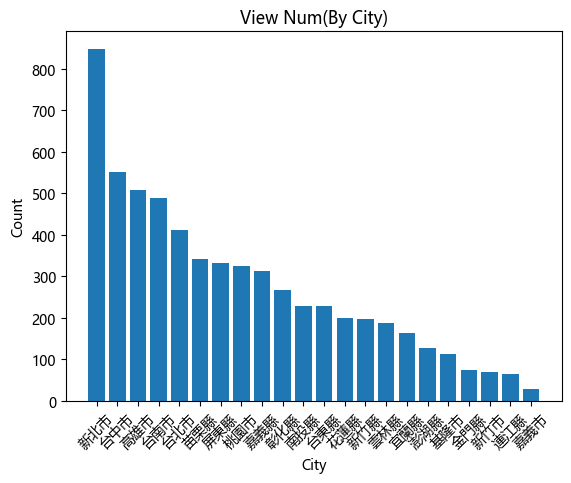

In [107]:
country_counts = df_search_overview['rw_city'].value_counts()

total_sum = country_counts.sum()
print('總資料筆數: ',len(df_search_overview['name']))
print('以分類比數:',total_sum)

# 創建長條圖
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('View Num(By City)')
plt.xticks(rotation=45)  # 旋轉 x 軸標籤
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.show()

In [108]:
print('total search count: ',len(df_search_overview))
df_search_overview.isnull().sum().drop(['keyword','rw_Monday_open','rw_Monday_close','rw_Tuesday_open','rw_Tuesday_close','rw_Wednesday_open','rw_Wednesday_close','rw_Thursday_open','rw_Thursday_close','rw_Friday_open','rw_Friday_close','rw_Saturday_open','rw_Saturday_close','rw_Sunday_open','rw_Sunday_close'])

total search count:  6075


name                  0
current_time          0
rating                0
rating_count          0
category             12
address            1481
introduce           656
Website               0
img                   0
latitude             32
longitude            32
rw_category          12
rw_tag               85
rw_tickets_sale    5823
rw_open_time        801
rw_introduction    4823
rw_phone           2618
rw_address            0
rw_city               0
rw_town              14
stay_time          3541
dtype: int64

整理經緯度空值問題

In [109]:
latitude_null = df_search_overview['latitude'].isnull()

因url格式不同造成無法順利獲取經緯度，故進行以下修正

In [110]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# 關閉這些設定
# pd.reset_option('display.max_colwidth')
# pd.reset_option('display.max_columns')

tmp_result = df_search_overview[latitude_null]
for i,k in enumerate(tmp_result['Website'].tolist()):
    df_search_overview.loc[df_search_overview['name']==tmp_result['name'].iloc[i],'latitude']=k.split("data=")[1].split("!")[8].split("d")[1]
    df_search_overview.loc[df_search_overview['name']==tmp_result['name'].iloc[i],'longitude']=k.split("data=")[1].split("!")[9].split("d")[1]
    # print(tmp_result['name'].iloc[i],end=" ")
    # print(k.split("data=")[1].split("!")[8].split("d")[1],end=" ")
    # print(k.split("data=")[1].split("!")[9].split("d")[1])
print(df_search_overview[latitude_null][['latitude','longitude']].head(2))

       latitude    longitude
134   23.765169  120.7189652
143  23.8111261  120.7485143


In [111]:
print('total search count: ',len(df_search_overview))
df_search_overview.isnull().sum().drop(['keyword','rw_Monday_open','rw_Monday_close','rw_Tuesday_open','rw_Tuesday_close','rw_Wednesday_open','rw_Wednesday_close','rw_Thursday_open','rw_Thursday_close','rw_Friday_open','rw_Friday_close','rw_Saturday_open','rw_Saturday_close','rw_Sunday_open','rw_Sunday_close'])

total search count:  6075


name                  0
current_time          0
rating                0
rating_count          0
category             12
address            1481
introduce           656
Website               0
img                   0
latitude              0
longitude             0
rw_category          12
rw_tag               85
rw_tickets_sale    5823
rw_open_time        801
rw_introduction    4823
rw_phone           2618
rw_address            0
rw_city               0
rw_town              14
stay_time          3541
dtype: int64

整理評分數量空值狀況

In [112]:
rating_count_null = df_search_overview['rating_count'].isnull()
print(df_search_overview[rating_count_null].index)
df_search_overview[rating_count_null]

Int64Index([], dtype='int64')


,keyword,name,current_time,rating,rating_count,category,address,introduce,Website,img,latitude,longitude,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_introduction,rw_phone,rw_address,rw_city,rw_town,stay_time


In [113]:
df_search_overview.drop(df_search_overview[rating_count_null].index, inplace=True)
print('刪除後: ')
rating_count_null = df_search_overview['rating_count'].isnull()
print(df_search_overview[rating_count_null])

刪除後: 
Empty DataFrame
Columns: [keyword, name, current_time, rating, rating_count, category, address, introduce, Website, img, latitude, longitude, rw_category, rw_tag, rw_tickets_sale, rw_open_time, rw_Monday_open, rw_Monday_close, rw_Tuesday_open, rw_Tuesday_close, rw_Wednesday_open, rw_Wednesday_close, rw_Thursday_open, rw_Thursday_close, rw_Friday_open, rw_Friday_close, rw_Saturday_open, rw_Saturday_close, rw_Sunday_open, rw_Sunday_close, rw_introduction, rw_phone, rw_address, rw_city, rw_town, stay_time]
Index: []


In [114]:
print('total search count: ',len(df_search_overview))
df_search_overview.isnull().sum().drop(['keyword','rw_Monday_open','rw_Monday_close','rw_Tuesday_open','rw_Tuesday_close','rw_Wednesday_open','rw_Wednesday_close','rw_Thursday_open','rw_Thursday_close','rw_Friday_open','rw_Friday_close','rw_Saturday_open','rw_Saturday_close','rw_Sunday_open','rw_Sunday_close'])

total search count:  6075


name                  0
current_time          0
rating                0
rating_count          0
category             12
address            1481
introduce           656
Website               0
img                   0
latitude              0
longitude             0
rw_category          12
rw_tag               85
rw_tickets_sale    5823
rw_open_time        801
rw_introduction    4823
rw_phone           2618
rw_address            0
rw_city               0
rw_town              14
stay_time          3541
dtype: int64

整理圖片空值狀況

In [115]:
img_null = df_search_overview['img'].isnull()
print(df_search_overview[img_null].index)
df_search_overview[img_null].head(2)

Int64Index([], dtype='int64')


,keyword,name,current_time,rating,rating_count,category,address,introduce,Website,img,latitude,longitude,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_introduction,rw_phone,rw_address,rw_city,rw_town,stay_time


發現有些景點圖片有問題，使用爬蟲進行修正嘗試(進行修正過後 部分資料圖片部分還有問題)

In [116]:
# mistake_img = df_search_overview.loc[df_search_overview['img'].apply(lambda x: isinstance(x, str) and not x.startswith('https://lh5') if pd.notna(x) else False)]
mistake_img = df_search_overview.loc[df_search_overview['img'].apply(lambda x: isinstance(x, str) and not x.startswith('https://') if pd.notna(x) else False)]

print('url不對的數量: ',len(mistake_img))
print(mistake_img[['name','img','Website']])
mistake_img.to_csv('tmp.csv',encoding='utf-8-sig')

url不對的數量:  2
      name                                                     img  \
4968  卓蘭老街  //maps.gstatic.com/tactile/pane/default_geocode-1x.png   
5778  集來農場  //maps.gstatic.com/tactile/pane/default_geocode-1x.png   

                                                                                                                                                                                                                                         Website  
4968  https://www.google.com/maps/place/%E5%8D%93%E8%98%AD%E8%80%81%E8%A1%97/data=!4m7!3m6!1s0x3469034a5d5ec627:0x4ee566d9d99f34d7!8m2!3d24.3143915!4d120.8266991!16s%2Fg%2F11qnjr6m_s!19sChIJJ8ZeXUoDaTQR1zSf2dlm5U4?authuser=0&hl=zh-TW&rclk=1  
5778    https://www.google.com/maps/place/%E9%9B%86%E4%BE%86%E8%BE%B2%E5%A0%B4/data=!4m7!3m6!1s0x346e5ce7ca76dd0b:0x2e04604be69dd85d!8m2!3d23.0094093!4d120.5832794!16s%2Fg%2F1tk9nhwg!19sChIJC912yudcbjQRXdid5ktgBC4?authuser=0&hl=zh-TW&rclk=1  


經確認確實沒圖片 且評論人數分別為1、8(暫不處理也不刪除)

建議停留時間轉成分鐘

In [117]:
print(len(df_search_overview[df_search_overview['stay_time'].notnull()]))
df_search_overview[df_search_overview['stay_time'].notnull()]['stay_time']

2534


10           1.5 小時
11             1 小時
12            45 分鐘
13            45 分鐘
16      20 分鐘到 1 小時
           ...     
6058       15-45 分鐘
6059          45 分鐘
6061          45 分鐘
6062         1.5 小時
6068    15 分鐘到 1 小時
Name: stay_time, Length: 2534, dtype: object

In [118]:
import re

def convert_to_minutes(time_str):
    if re.match(r'\d+ 分鐘到 \d+\.?\d* 小時', time_str):
        match = re.findall(r'\d+\.?\d*', time_str)
        return int((float(match[0]) + float(match[1])* 60) / 2)
    elif re.match(r'\d+ 小時到 \d+\.?\d* 小時', time_str):
        match = re.findall(r'\d+\.?\d*', time_str)
        return int((float(match[0]) + float(match[1])) * 60 / 2)
    elif re.match(r'\d+ 分鐘到 \d+\.?\d* 分鐘', time_str):
        match = re.findall(r'\d+\.?\d*', time_str)
        return int((float(match[0]) + float(match[1])) / 2)
    elif re.match(r'\d+\.?\d* 小時', time_str):
        hours = float(time_str.split()[0])
        return int(hours * 60)
    elif re.match(r'\d+ 分鐘', time_str):
        return int(time_str.split()[0])
    elif re.match(r'\d+-\d+\.?\d* 分鐘', time_str):
        match = re.findall(r'\d+\.?\d*', time_str)
        return int((float(match[0]) + float(match[1])) / 2)
    elif re.match(r'\d+(\.\d+)?-\d+(\.\d+)? 小時', time_str):
        match = re.findall(r'\d+\.?\d*', time_str)
        return int((float(match[0]) + float(match[1])) * 60/ 2)
    else:
        return None

In [119]:
for time_str in df_search_overview[df_search_overview['stay_time'].notnull()]['stay_time']:
    minutes = convert_to_minutes(time_str)
    # if minutes is None:
    #     convert_to_minutes_2(time_str)
    if minutes is None:    
        continue
    df_search_overview.loc[df_search_overview['stay_time']== time_str,'stay_time']=minutes

In [120]:
df_search_overview.rename(columns={'stay_time': 'stay_time_min'}, inplace=True)

In [121]:
print(len(df_search_overview[df_search_overview['stay_time_min'].notnull()]))
df_search_overview[df_search_overview['stay_time_min'].notnull()]['stay_time_min']

2534


10      90
11      60
12      45
13      45
16      40
        ..
6058    30
6059    45
6061    45
6062    90
6068    37
Name: stay_time_min, Length: 2534, dtype: object

In [122]:
not_only_numeric_or_nan = df_search_overview[~df_search_overview['stay_time_min'].apply(lambda x: isinstance(x, (int, float)) or pd.isna(x))]

print("check stay_time欄位中非空or非數字的數量：",len(not_only_numeric_or_nan))
# print(len(not_only_numeric_or_nan))
# print(not_only_numeric_or_nan)

check stay_time欄位中非空or非數字的數量： 0


In [123]:
print('total search count: ',len(df_search_overview))
df_search_overview.isnull().sum().drop(['keyword','rw_Monday_open','rw_Monday_close','rw_Tuesday_open','rw_Tuesday_close','rw_Wednesday_open','rw_Wednesday_close','rw_Thursday_open','rw_Thursday_close','rw_Friday_open','rw_Friday_close','rw_Saturday_open','rw_Saturday_close','rw_Sunday_open','rw_Sunday_close'])

total search count:  6075


name                  0
current_time          0
rating                0
rating_count          0
category             12
address            1481
introduce           656
Website               0
img                   0
latitude              0
longitude             0
rw_category          12
rw_tag               85
rw_tickets_sale    5823
rw_open_time        801
rw_introduction    4823
rw_phone           2618
rw_address            0
rw_city               0
rw_town              14
stay_time_min      3541
dtype: int64

營業時間為空值的狀況(根據評論數量進行過濾挑選部分景點進行人工補值)

In [124]:
rw_open_time_null = df_search_overview['rw_open_time'].isnull()
print('營業時間為空值數量:',len(df_search_overview[rw_open_time_null]))
tmp_opentime_null=df_search_overview[rw_open_time_null].sort_values(by='rating_count')
tmp_opentime_null=tmp_opentime_null[['name','Website','rating','rating_count']]
tmp_opentime_null.to_csv('opentime_null.csv',encoding='utf-8-sig')
tmp_opentime_null.head(2)

營業時間為空值數量: 801


,name,Website,rating,rating_count
1426,黃金花旗木,https://www.google.com/maps/place/%E9%BB%83%E9%87%91%E8%8A%B1%E6%97%97%E6%9C%A8/data=!4m7!3m6!1s0x346ecb74f915b23f:0x380a24b2705404ec!8m2!3d23.828358!4d120.60714!16s%2Fg%2F11kjf4lnvv!19sChIJP7IV-XTLbjQR7ARUcLIkCjg?authuser=0&hl=zh-TW&rclk=1,4.0,1.0
426,活水生態園區,https://www.google.com/maps/place/%E6%B4%BB%E6%B0%B4%E7%94%9F%E6%85%8B%E5%9C%92%E5%8D%80/data=!4m7!3m6!1s0x346ea30fa7c94903:0xc679914fa5ba19b7!8m2!3d23.5676958!4d120.3169723!16s%2Fg%2F11sx4h7n96!19sChIJA0nJpw-jbjQRtxm6pU-RecY?authuser=0&hl=zh-TW&rclk=1,5.0,1.0


https://docs.google.com/spreadsheets/d/1wwDB46B5f8yDqOTn7oYd28tQ0zwpHcWUIQpEy7NGGjo/edit#gid=2127927578
放到此excel中，後續找完營業時間後，再來補值

從category中發現，旅遊景點中含有一些不應該有的項目ex.餐廳、民宿等，故將這些確定無關的刪除

In [125]:
drop_category_list=['熟食店','餐廳','闔家皆宜料理','客家料理','燒烤','素食料理','食品供應商','民宿','珍珠奶茶','小菜','嚴格素食料理','住宿','麵店','居酒屋','拉麵','快餐','火鍋','涮涮鍋','鐵板燒','泰國菜','中式包點店','意大利菜','日本地方料理餐廳','早餐','壽司','台灣菜','各種意大利麵','甜品店','小吃店','海鮮料理','美式餐車店','海鮮批發商']

In [126]:
# 使用 isin 方法篩選出符合條件的項目
df_drop_category = df_search_overview[df_search_overview['category'].isin(drop_category_list)]

# 使用 value_counts 方法計算每個值的數量
value_counts = df_drop_category['category'].value_counts().sum()

print(value_counts)

91


In [127]:
# 刪除 & check
df_search_overview.drop(df_search_overview[df_search_overview['category'].isin(drop_category_list)].index, inplace=True)
df_search_overview[df_search_overview['category'].isin(drop_category_list)]

,keyword,name,current_time,rating,rating_count,category,address,introduce,Website,img,latitude,longitude,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_introduction,rw_phone,rw_address,rw_city,rw_town,stay_time_min


In [128]:
# 如果是數字則清空這欄位的值
print("Rows with numeric 'category' values:")
for str_i in range(10):
    tmp_str_i = str(str_i)
    numeric_rows = df_search_overview[df_search_overview['category']==tmp_str_i]
    if not numeric_rows.empty:
        print(numeric_rows[['name','category']])
        df_search_overview.loc[numeric_rows.index, 'category'] = None

Rows with numeric 'category' values:
             name category
5210  覓境E19蒙古包露營區        1
          name category
5218  藍映海岸景觀民宿        2
         name category
826  香格里拉休閒農場        3
                  name category
2301       北海岸愛之船民宿&餐廳        4
5036  虎山溫泉會館(湯之島)-泰安溫泉        4


In [129]:
#  check 
print("Rows with numeric 'category' values:")
for str_i in range(10):
    tmp_str_i = str(str_i)
    numeric_rows = df_search_overview[df_search_overview['category']==tmp_str_i]
    if not numeric_rows.empty:
        print(numeric_rows[['name','category']])

Rows with numeric 'category' values:


查詢name字串中資料有'民宿' 字眼的項目有哪些

In [130]:
keywords = ['民宿']

filtered_df = df_search_overview[df_search_overview['name'].str.contains('|'.join(keywords))]

print(filtered_df['name'])

2301                                                   北海岸愛之船民宿&餐廳
4980    南庄橄欖樹【民宿+咖啡廳】《走進王子公主童話的美拍地》《沒養貓也可以來拍貓》《「橄」於跟她求婚的創意就在橄欖樹民宿》
5218                                                      藍映海岸景觀民宿
5649                                                     瑞山樂活田莊民宿區
Name: name, dtype: object


-> 暫不刪除 因為感覺好像都與景點多多少少有些聯繫

新增營業時間欄位

In [131]:
import re

def opentime_dataclean(rw_open_time):
    
    weekday_order = ['星期一', '星期二', '星期三', '星期四', '星期五', '星期六', '星期日']

    # 處理1. 24小時營業景點，營業時間調整為00:00-23:59
    rw_open_time = rw_open_time.replace('24 小時營業', '00:00–23:59')

    weekday_opentime_dict = {}
    reg_ex = r'\d{2}:\d{2}–\d{2}:\d{2}'

    for eachday in rw_open_time.split():
        weekday = eachday[:3]
        # 處理2. 分段營業時間
        time_ranges = re.findall(reg_ex, eachday)

        # 處理3. 針對營業時間跨天(close < start)做調整: close=23:59
        adjusted_time_ranges = []
        for time_range in time_ranges:
            start_time, end_time = map(str.strip, time_range.split('–'))

            if start_time <= end_time:
                adjusted_time_ranges.append(str(start_time) + '–' + str(end_time))
            else:
                adjusted_time_ranges.append(str(start_time) + '–' + '23:59')

        weekday_opentime_dict[weekday] = adjusted_time_ranges


    # Result1. 每日營業時間(dict) = {key(星期):value(營業時間區段)}
    weekday_opentime_dict = {key: weekday_opentime_dict[key] for key in weekday_order}
    
    # Result2. 使用list記錄每天是否有營業
    is_open_list = [1 if weekday_opentime_dict[day] else 0 for day in weekday_order]

    return weekday_opentime_dict, is_open_list

In [132]:
df1 = df_search_overview.copy()  # 複製一個新的 DataFrame，以免修改原始數據

df1['weekday_opentime_dict'] = None
df1['is_open_list'] = None

# 僅針對非 nan 值進行處理
for index, row in df1.iterrows():
    # 對 df['rw_open_time'] 欄位進行處理並儲存結果到新的欄位
    if pd.notna(row['rw_open_time']):
        weekday_opentime_dict, is_open_list = opentime_dataclean(row['rw_open_time'])
        df1.at[index, 'weekday_opentime_dict'] = weekday_opentime_dict
        df1.at[index, 'is_open_list'] = is_open_list

df1.head(1)

,keyword,name,current_time,rating,rating_count,category,address,introduce,Website,img,latitude,longitude,rw_category,rw_tag,rw_tickets_sale,rw_open_time,rw_Monday_open,rw_Monday_close,rw_Tuesday_open,rw_Tuesday_close,rw_Wednesday_open,rw_Wednesday_close,rw_Thursday_open,rw_Thursday_close,rw_Friday_open,rw_Friday_close,rw_Saturday_open,rw_Saturday_close,rw_Sunday_open,rw_Sunday_close,rw_introduction,rw_phone,rw_address,rw_city,rw_town,stay_time_min,weekday_opentime_dict,is_open_list
0,南投縣中寮鄉 景點推薦,中寮劉家梅園休園（一期一會明年再見）,2023-08-02 18:35:21,4.3,125.0,旅遊景點,頂坑巷12號,NaN,https://www.google.com/maps/place/%E4%B8%AD%E5%AF%AE%E5%8A%89%E5%AE%B6%E6%A2%85%E5%9C%92+%E4%BC%91%E5%9C%92+%EF%BC%88%E4%B8%80%E6%9C%9F%E4%B8%80%E6%9C%83%E6%98%8E%E5%B9%B4%E5%86%8D%E8%A6%8B%EF%BC%89/data=!4m7!3m6!1s0x346928a161e870a5:0xf5b64d71087260e8!8m2!3d23.9553273!4d120.8237057!16s%2Fg%2F11c6cfq6j2!19sChIJpXDoYaEoaTQR6GByCHFNtvU?authuser=0&hl=zh-TW&rclk=1,https://lh5.googleusercontent.com/p/AF1QipPowNN_-sHOTh7S1CrIeWfaL5bUqc9sLM2FbCA-=w162-h92-k-no,23.955327,120.823706,旅遊景點,無障礙入口 無障礙停車場 適合兒童,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0983 756 921,541南投縣中寮鄉頂坑巷12號,南投縣,中寮鄉,NaN,None,None


In [133]:
df_search_overview=df1

根據爬蟲指定點到各景點的結果，找出有些景點無法抵達以下刪除這些資料

水漾森林 聖母登山步道 北大武山神社 落日亭 北大武神木 雪山圈谷 七彩湖

In [134]:
print('data len before',len(df_search_overview))
values_to_remove = ['水漾森林', '聖母登山步道', '北大武山神社','落日亭','北大武神木','雪山圈谷','七彩湖']

condition = ~df_search_overview['name'].isin(values_to_remove)
df_search_overview = df_search_overview[condition]

df_search_overview = df_search_overview.reset_index(drop=True)
print('data len after',len(df_search_overview))


data len before 5984
data len after 5977


In [135]:
# df_search_overview.to_csv('search_clear.csv',encoding='utf-8-sig')
df_search_overview.to_csv('search_clear_del_notravel.csv',encoding='utf-8-sig')

還可以做 將review整理後的資料合併進來ex 有效評論、1~5星各自數量等